In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


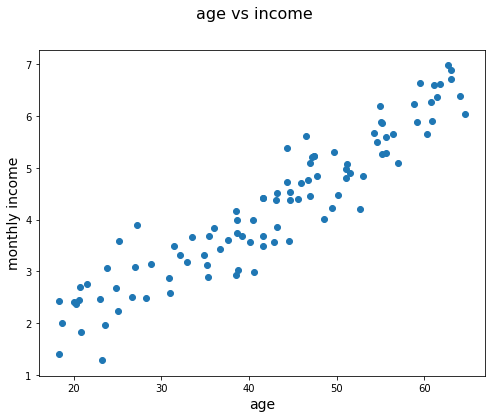

In [2]:
# plot 
np.random.seed(1234)

age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)
age = age.reshape(-1,1)

fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

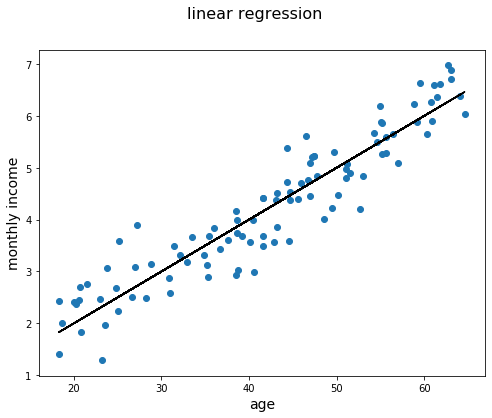

In [3]:
# Linear Regression plot

fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.plot(age, age/10, c='black')
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

In [4]:
# convert binary data 

income_bin = income > 4
income_bin = income_bin.astype(int)  
print(income_bin)

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1]


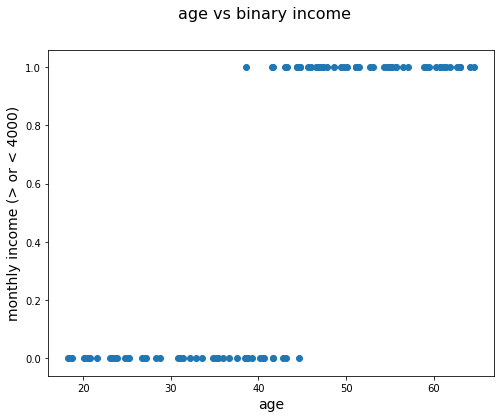

In [5]:
# plot Binary data , Classification

fig = plt.figure(figsize=(8, 6))
fig.suptitle('age vs binary income', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income (> or < 4000)', fontsize=14)
plt.show()

In [41]:
# import sklearn libryry
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression



In [7]:
# Create linear regression model
lin_reg = LinearRegression()
lin_reg.fit(age, income_bin)
# Store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# Create the line
lin_income = (interc + age * coef)

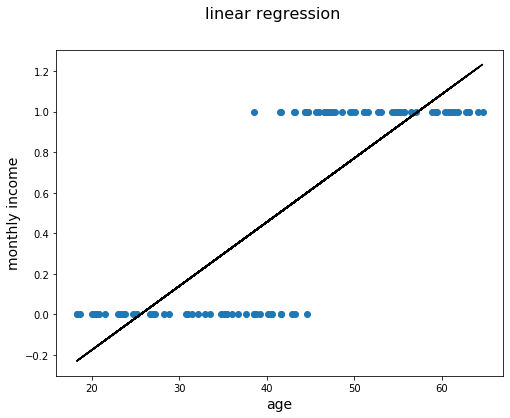

In [8]:
# plot regression 
fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.plot(age, lin_income, c='black')
plt.show()

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
regr = LogisticRegression(C=1e5, solver='liblinear')

# Fit the model to the training set
regr.fit(age, income_bin)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Store the coefficients
coef = regr.coef_
interc = regr.intercept_

# Create the linear predictor
lin_pred = (age * coef + interc)

# Perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))

# Sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

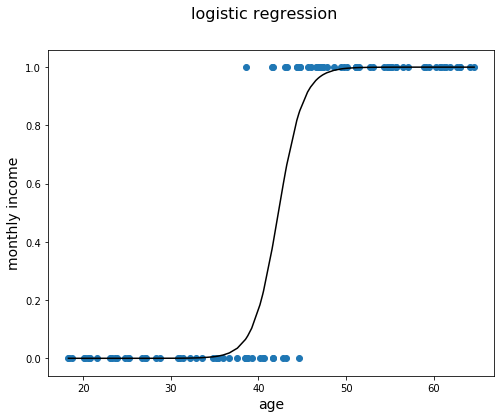

In [11]:
# plot logistic Regression
fig = plt.figure(figsize=(8, 6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c='black')
plt.show()

In [14]:
age.shape[0]

100

In [17]:
intercept = np.ones((age.shape[0],1))

In [18]:
np.concatenate((intercept,age),axis =1)

array([[ 1.        , 27.00141417],
       [ 1.        , 47.23911224],
       [ 1.        , 38.57320373],
       [ 1.        , 54.91185343],
       [ 1.        , 54.65886298],
       [ 1.        , 30.81185245],
       [ 1.        , 30.99381999],
       [ 1.        , 55.68799234],
       [ 1.        , 63.03254962],
       [ 1.        , 59.16883383],
       [ 1.        , 34.81741169],
       [ 1.        , 41.5467709 ],
       [ 1.        , 50.12275795],
       [ 1.        , 51.49699527],
       [ 1.        , 35.40178548],
       [ 1.        , 44.37622075],
       [ 1.        , 41.64490877],
       [ 1.        , 18.64711713],
       [ 1.        , 54.32285122],
       [ 1.        , 59.48413596],
       [ 1.        , 35.14964124],
       [ 1.        , 46.92362039],
       [ 1.        , 21.54291836],
       [ 1.        , 35.33472828],
       [ 1.        , 61.85758479],
       [ 1.        , 48.61477273],
       [ 1.        , 36.66852115],
       [ 1.        , 55.07031672],
       [ 1.        ,

In [43]:
# class built for logistic Regression 

class LogisticRegression_manual:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.weight = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.weight)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.weight -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.weight)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.weight))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [44]:
# fit model from class 
model = LogisticRegression_manual(lr=0.1,num_iter= 300000)
model.fit(age,income_bin)

In [45]:
preds = model.predict(age,0.5)

In [46]:
(preds == income_bin).mean()

0.93

In [47]:
# fit model sklearn class
# import sklearn libryry
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
    
lg = LogisticRegression()
lg.fit(age,income_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# predict  and  and evaluation

predict_income_bin = lg.predict(age)


In [56]:
# import metrics

from sklearn.metrics import confusion_matrix,precision_score,recall_score

print("confusion matrix")
print(confusion_matrix(income_bin,predict_income_bin))

print("Precision Score")
print(precision_score(income_bin,predict_income_bin))

print("Recall Score")
print(recall_score(income_bin,predict_income_bin))

confusion matrix
[[44  3]
 [ 3 50]]
Precision Score
0.9433962264150944
Recall Score
0.9433962264150944
